In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../database/cars.csv')
df.sample(5)

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
14721,Seat,Cordoba,mechanical,black,354000,1995,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,False,True,28
5505,Mitsubishi,Outlander,automatic,black,243000,2007,gasoline,False,gasoline,3.0,...,True,True,False,True,True,False,True,True,True,42
29372,BMW,523,automatic,silver,398850,1996,gasoline,False,gasoline,2.5,...,True,True,True,True,True,True,True,True,True,44
37488,Peugeot,406,mechanical,blue,400000,1998,gasoline,False,gasoline,1.8,...,False,False,False,False,False,False,False,False,False,34
32154,Skoda,Kodiaq,automatic,grey,0,2019,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,False,26


In [4]:
df['price_usd'].describe()

count    38531.000000
mean      6639.971021
std       6428.152018
min          1.000000
25%       2100.000000
50%       4800.000000
75%       8990.000000
max      50000.000000
Name: price_usd, dtype: float64

In [5]:
#desviacion estandar
df['price_usd'].std()

6428.1520182029035

In [6]:
#Rango = valor max - valor min
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [7]:
#Quartiles
median = df['price_usd'].median()
median

4800.0

In [8]:
Q1 = df['price_usd'].quantile(q=0.25)
Q2 = df['price_usd'].quantile(q=0.5)
Q3 = df['price_usd'].quantile(q=0.75)

Q1, Q2, Q3

(2100.0, 4800.0, 8990.0)

In [9]:
min_val = df['price_usd'].quantile(q=0)
max_val = df['price_usd'].quantile(q=1)
min_val, max_val

(1.0, 50000.0)

In [10]:
#calcular el Rango intercuartil
iqr = Q3 - Q1
iqr

6890.0

Límites para detección de outliers (datos simetricamente distribuidos)

Datos entre:

limite inferior = $Q1−1.5×IQR$

limite superior = $Q3+1.5×IQR$

* nos ayuda a encontrar los outliyer

In [11]:
minlimit = Q1 - 1.5 * iqr
maxlimit = Q3 + 1.5 * iqr
minlimit, maxlimit 


(-8235.0, 19325.0)

<AxesSubplot:xlabel='price_usd'>

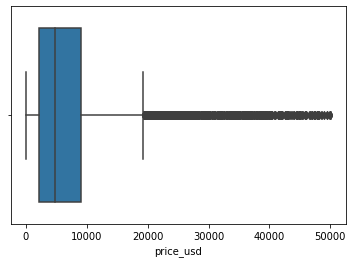

In [12]:
sns.boxplot(x = df['price_usd'])

<AxesSubplot:xlabel='engine_fuel', ylabel='price_usd'>

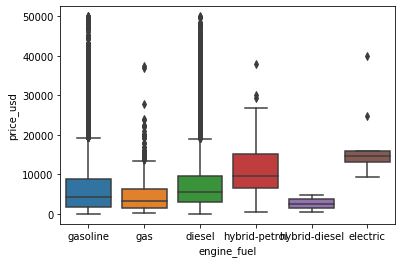

<AxesSubplot:xlabel='price_usd', ylabel='Count'>

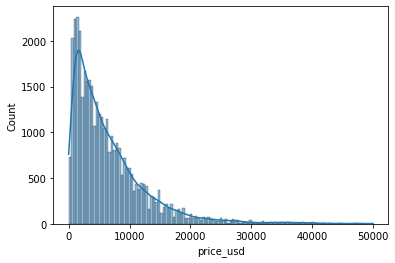

In [14]:
sns.histplot(x = 'price_usd', data = df, kde=True)

<AxesSubplot:xlabel='year_produced', ylabel='price_usd'>

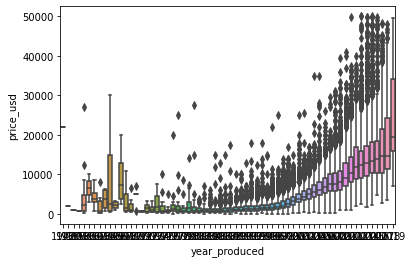

In [21]:
sns.boxplot(x = 'year_produced', y = 'price_usd', data = df)

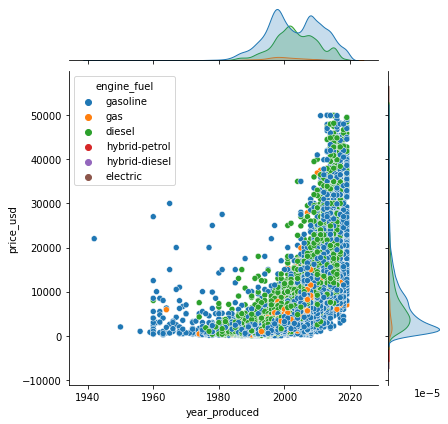

In [22]:
sns.jointplot(x='year_produced', y='price_usd', data=df, hue='engine_fuel')